### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


#### (1) What is the independent variable? What is the dependent variable?

The independent variable is congruent and incongruent condition.

The dependent variable is the response time.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hypothesis: There's no difference between the mean response time in congruent and incongruent condition, which is $\mu_c = \mu_{ic}$.

Alternative hypothesis: The mean response time in congruent condition is different from that in incongruent condition, which is $\mu_c \neq \mu_{ic}$.

Since the test is to judge a person's psychological capacities, we use a two-tailed paired T-test. Paired T-test is to test the same sample assigned into 2 different condition. Meanwhile, as we set the alternative hypothesis as $\mu_c \neq \mu_{ic}$, we choose a two-tailed T-test instead of a one-tailed one.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import *
%matplotlib inline
np.random.seed(42)

In [26]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [27]:
print('The average response time of Congruent condition is: ' + str(df['Congruent'].mean()) + 's')
print('The standard deviation of Congruent condition response time is ' + str(np.std(df['Congruent'])))

The average response time of Congruent condition is: 14.051125s
The standard deviation of Congruent condition response time is 3.48441571277


--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

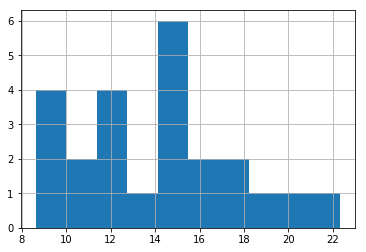

In [28]:
df['Congruent'].hist()

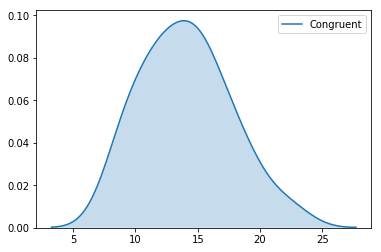

In [29]:
sns.kdeplot(df['Congruent'], shade=True)

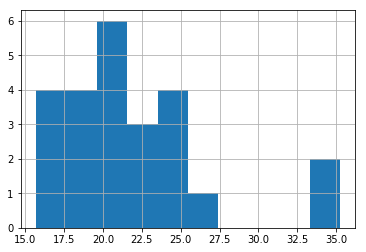

In [30]:
df['Incongruent'].hist()

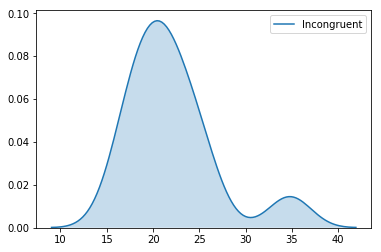

In [31]:
sns.kdeplot(df['Incongruent'], shade=True)

From the plots above, we see that the data with Congruent condition seems to be normally distributed, and the mean of the data is approximately 15. However, those with Incongruent condition are not normmally distributed. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

##### Method 1: calling ttest_ind 

In [32]:
stats.ttest_ind(df['Congruent'],df['Incongruent'], equal_var=False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)

In [ ]:
##### Method 1: calculate t-statistic using the definition

In [67]:
dof = len(df['Congruent']) - 1
dof

23

In [70]:
con_mean = df['Congruent'].mean()
incon_mean = df['Incongruent'].mean()
diff_mean = incon_mean - con_mean

In [82]:
df['diff'] = df['Incongruent'] - df['Congruent']
std = np.std(df['diff'])
std

4.7623980302221582

In [86]:
t_statistic = diff_mean/(std / (sqrt(dof)))
t_statistic


8.0207069441099588

From the table in https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg, we can see that when the confidence level is 0.9 and degrees of freedom is 23, t_critical = 1.711. Therefore, t_statistic > t_critical.

I set the confidence level as 0.9. I use two methods to calculate p-value. As the results listed in the first method, which is to call ttest_ind function directly, the p-value is 6.5e-08, which is far more less than 0.05. I also use the traditional method to calculate the t_statistic, and gets the similar result. Therefore, we can conclude that we can reject the null hypothesis. In other words, the response time in congruent condition is different from that in incongruent condition.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--